In [80]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [81]:
data = pd.read_csv('./RGB_data/data_0618.csv')

features = data.iloc[:, 0:3]
labels = data['Label']
print(features)

std = StandardScaler()
features = std.fit_transform(features)
print(features)

       B    G    R
0    252  244  234
1    253  249  237
2    246  240  232
3    217  213  205
4    230  221  212
..   ...  ...  ...
919   70   82   79
920   86   84   80
921   56   58   49
922   66   72   60
923   66   62   54

[924 rows x 3 columns]
[[ 1.58823946  1.55478579  1.39611994]
 [ 1.60206924  1.62861091  1.43888995]
 [ 1.50526078  1.49572569  1.3676066 ]
 ...
 [-1.12239739 -1.19150867 -1.24136409]
 [-0.9840996  -0.98479834 -1.08454072]
 [-0.9840996  -1.13244858 -1.17008074]]


In [82]:
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                     test_size=0.25, random_state=42)
print(X_train)
print(X_train[:, 2])

[[-0.97026982 -1.13244858 -1.11305406]
 [ 0.21909125  0.22593363  0.39815301]
 [-1.09473783 -1.30962886 -1.31264744]
 ...
 [-1.39899299 -1.56063427 -1.55501084]
 [-1.32984409 -1.22103872 -1.35541745]
 [ 0.93823981  0.97894985  1.18226988]]
[-1.11305406  0.39815301 -1.31264744 -0.18637048 -0.17211381 -0.48576056
  1.23929657 -0.04380377  1.11098653 -1.09879739 -1.22710742  1.42463328
  0.82585312 -0.88494733 -1.04177071 -1.15582407 -1.08454072 -1.25562076
  0.31261299 -0.84217732 -0.69961061  1.3676066  -0.50001723  0.8828798
 -1.21285075 -1.15582407  1.19652655 -1.39818747 -0.88494733 -0.899204
  1.1252432  -1.56926751 -1.25562076 -0.40022054 -0.99900069 -0.24339716
  1.1252432   1.59571333  0.84010979  1.49591663 -1.08454072 -0.50001723
  1.39611994 -1.35541745 -0.34319385  0.91139315 -1.5264975   1.46740329
 -1.21285075 -1.12731073  1.03970318  1.09672986 -1.17008074 -0.87069066
  0.9826765   0.09876293  0.5977464  -1.58352418 -0.97048735 -1.22710742
 -1.07028405  0.66902975 -1.39818

In [83]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [84]:
y_pred = cls.predict(X_test)

# 计算并打印准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}\n')

# 计算并打印分类报告
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Model accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       134
           1       0.97      0.97      0.97        97

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



In [93]:
clf.coef_[0], clf.coef_ 

(array([1.38004069, 0.91025159, 2.25407392]),
 array([[1.38004069, 0.91025159, 2.25407392]]))

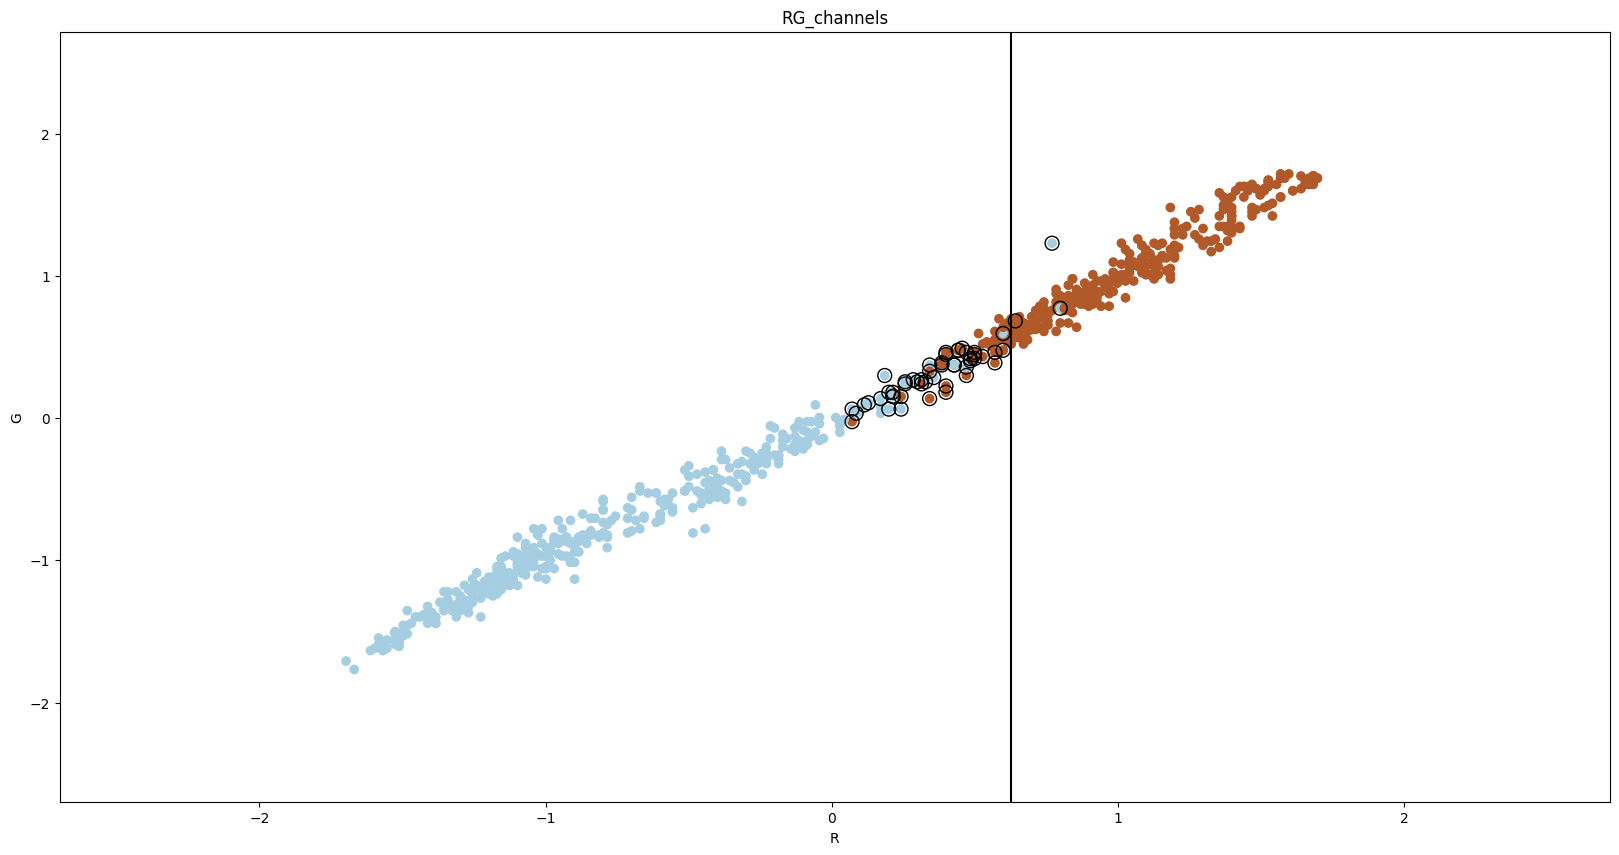

In [97]:
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(X_train.iloc[:, 2], X_train.iloc[:, 1], 
           c=y_train, cmap=plt.cm.Paired)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_title('RG_channels')

w = clf.coef_[0]
b = clf.intercept_[0]

# 获取支持向量
support_vectors = clf.support_vectors_
ax.scatter(support_vectors[:, 2], support_vectors[:, 1], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')

# 绘制RG的决策边界
xx = np.linspace(X_train.iloc[:, 2].min() - 1, X_train.iloc[:, 1].max() + 1, 500)
yy = np.linspace(X_train.iloc[:, 2].min() - 1, X_train.iloc[:, 1].max() + 1, 500)
X1, X2 = np.meshgrid(xx, yy)
Z = -w[2] / w[1] * X1 - b / w[1]
ax.contour(X1, X2, Z, colors='k', levels=[0], linestyles=['-'])

plt.show()

In [ ]:
def plot_svm_decision_boundaries(clf, X_train, y_train):
    # 创建一个图形窗口，大小为20x10英寸
    fig = plt.figure(figsize=(18, 12))

    # 创建四个子图，排列为2行2列
    # axs是一个2x2的数组，每个元素代表一个子图对象
    axs = fig.subplots(2, 2)

    # 将子图数组展平，方便索引
    axs = axs.flatten()

    # BGR (3D) 图
    # 创建3D子图，位置在左上角（221表示2行2列中的第1个）
    ax1 = fig.add_subplot(221, projection='3d')
    # 绘制BGR数据点
    ax1.scatter(X_train[feature_names[0]], X_train[feature_names[1]], X_train[feature_names[2]], c=y_train, cmap=plt.cm.Paired)
    # 设置坐标轴标签
    ax1.set_xlabel(feature_names[0])
    ax1.set_ylabel(feature_names[1])
    ax1.set_zlabel(feature_names[2])
    # 设置子图标题
    ax1.set_title('BGR Channels')

    # 获取支持向量
    support_vectors = clf.support_vectors_
    # 在3D图中绘制支持向量
    ax1.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')

    # 计算并绘制决策边界
    w = clf.coef_[0]
    b = clf.intercept_[0]
    xx = np.linspace(X_train[feature_names[0]].min() - 1, X_train[feature_names[0]].max() + 1, 10)
    yy = np.linspace(X_train[feature_names[1]].min() - 1, X_train[feature_names[1]].max() + 1, 10)
    X1, X2 = np.meshgrid(xx, yy)
    Z = -w[0] / w[2] * X1 - w[1] / w[2] * X2 - b / w[2]
    ax1.plot_surface(X1, X2, Z, alpha=0.5, rstride=1, cstride=1, color='k', linewidth=0)

    # RG 图 21
    ax2 = axs[1]
    ax2.scatter(X_train[feature_names[2]], X_train[feature_names[1]], c=y_train, cmap=plt.cm.Paired)
    ax2.set_xlabel(feature_names[2])
    ax2.set_ylabel(feature_names[1])
    ax2.set_title('RG Channels')

    # 在RG图中绘制支持向量
    ax1.scatter(support_vectors[:, 2], support_vectors[:, 1], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')

    # 绘制RG的决策边界
    xx = np.linspace(X_train[feature_names[2]].min() - 1, X_train[feature_names[2]].max() + 1, 500)
    yy = np.linspace(X_train[feature_names[1]].min() - 1, X_train[feature_names[1]].max() + 1, 500)
    X1, X2 = np.meshgrid(xx, yy)
    Z = -w[2] / w[1] * X1 - b / w[1]
    ax2.contour(X1, X2, Z, colors='k', levels=[0], linestyles=['-'])

    # RB 图 20
    ax3 = axs[2]
    ax3.scatter(X_train[feature_names[2]], X_train[feature_names[0]], c=y_train, cmap=plt.cm.Paired)
    ax3.set_xlabel(feature_names[2])
    ax3.set_ylabel(feature_names[0])
    ax3.set_title('RB Channels')

    # 在RB图中绘制支持向量
    ax1.scatter(support_vectors[:, 2], support_vectors[:, 0], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')

    # 绘制RB的决策边界
    xx = np.linspace(X_train[feature_names[2]].min() - 1, X_train[feature_names[2]].max() + 1, 500)
    yy = np.linspace(X_train[feature_names[0]].min() - 1, X_train[feature_names[0]].max() + 1, 500)
    X1, X2 = np.meshgrid(xx, yy)
    Z = -w[2] / w[0] * X1 - b / w[0]
    ax3.contour(X1, X2, Z, colors='k', levels=[0], linestyles=['-'])

    # BG 图 01
    ax4 = axs[3]
    ax4.scatter(X_train[feature_names[0]], X_train[feature_names[1]], c=y_train, cmap=plt.cm.Paired)
    ax4.set_xlabel(feature_names[0])
    ax4.set_ylabel(feature_names[1])
    ax4.set_title('BG Channels')

    # 在BG图中绘制支持向量
    ax1.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')    

    # 绘制BG的决策边界
    xx = np.linspace(X_train[feature_names[0]].min() - 1, X_train[feature_names[0]].max() + 1, 500)
    yy = np.linspace(X_train[feature_names[1]].min() - 1, X_train[feature_names[1]].max() + 1, 500)
    X1, X2 = np.meshgrid(xx, yy)
    Z = -w[0] / w[1] * X1 - b / w[1]
    ax4.contour(X1, X2, Z, colors='k', levels=[0], linestyles=['-'])

    # 自动调整子图布局，避免重叠
    plt.tight_layout()
    # 显示图形
    plt.show()

# 假设X_train是训练数据，y_train是标签，clf是训练好的SVM模型
# 调用函数，传入SVM模型、训练数据、标签和特征名称
plot_svm_decision_boundaries(clf, X_train, y_train)